# Gowdy T3 Cosmologies Revisited by Hern and Stewart
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 19, 2022

https://arxiv.org/abs/gr-qc/9708038

Paper mentions on page 3 next to last paragraph CLAWPACK

https://www.clawpack.org/pyclaw/

In [20]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [21]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [22]:
tau,theta,sigma,delta,dtau,dtheta,dsigma,ddelta = symbols('tau theta sigma delta dtau dtheta dsigma ddelta')

In [23]:
P = Function('P')(tau,theta)
P

In [24]:
Q = Function('Q')(tau,theta)
Q

In [25]:
Lambda = Function('lambda')(tau,theta)
Lambda

In [26]:
variables = Matrix([tau,theta,sigma,delta])
variables

⎡τ⎤
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎢σ⎥
⎢ ⎥
⎣δ⎦

In [27]:
differentials = Matrix([dtau,dtheta,dsigma,ddelta])
differentials 

⎡ dtau ⎤
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎢dsigma⎥
⎢      ⎥
⎣ddelta⎦

In [28]:
lineElement = expand(exp(Lambda/2)*exp(tau/2)*( - exp(-2*tau)*dtau**2 + dtheta**2) + exp(-tau)* ( exp(P)*dsigma**2 + 2*exp(P)*Q*dsigma*ddelta + (exp(P) *Q**2 + exp(-P)) *ddelta**2))
lineElement 

In [29]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  -3⋅τ   λ(τ, θ)                                                                          ⎤
⎢  ─────  ───────                                                                          ⎥
⎢    2       2                                                                             ⎥
⎢-ℯ     ⋅ℯ              0                0                              0                  ⎥
⎢                                                                                          ⎥
⎢                   τ  λ(τ, θ)                                                             ⎥
⎢                   ─  ───────                                                             ⎥
⎢                   2     2                                                                ⎥
⎢       0          ℯ ⋅ℯ                  0                              0                  ⎥
⎢                                                                                          ⎥
⎢                                    -τ  P(τ, θ)                      

In [30]:
import sympy

In [31]:
m = sympy.Array(g)
m

⎡  -3⋅τ   λ(τ, θ)                                                                          ⎤
⎢  ─────  ───────                                                                          ⎥
⎢    2       2                                                                             ⎥
⎢-ℯ     ⋅ℯ              0                0                              0                  ⎥
⎢                                                                                          ⎥
⎢                   τ  λ(τ, θ)                                                             ⎥
⎢                   ─  ───────                                                             ⎥
⎢                   2     2                                                                ⎥
⎢       0          ℯ ⋅ℯ                  0                              0                  ⎥
⎢                                                                                          ⎥
⎢                                    -τ  P(τ, θ)                      

In [32]:
from einsteinpy.symbolic import *

In [33]:
syms = sympy.symbols("tau theta sigma delta")
tau,theta,sigma,delta = syms

In [34]:
metric = MetricTensor(m,syms)

In [35]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂                     ∂                                                                   
⎢⎢──(λ(τ, θ))           ──(λ(τ, θ))                                                         
⎢⎢∂τ            3       ∂θ                                                                  
⎢⎢─────────── - ─       ───────────                                         0               
⎢⎢     4        4            4                                                              
⎢⎢                                                                                          
⎢⎢  ∂              ⎛∂              ⎞  2⋅τ                                                   
⎢⎢  ──(λ(τ, θ))    ⎜──(λ(τ, θ)) + 1⎟⋅ℯ                                                      
⎢⎢  ∂θ             ⎝∂τ             ⎠                                                        
⎢⎢  ───────────    ──────────────────────                                   0               
⎢⎢       4                   4                                        

In [36]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                               2                    2      
⎢                          2                2                  ∂              -2⋅τ  ∂       
⎢   2⋅P(τ, θ) ⎛∂          ⎞    ⎛∂          ⎞    ∂             ───(λ(τ, θ))   ℯ    ⋅───(λ(τ, 
⎢  ℯ         ⋅⎜──(Q(τ, θ))⎟    ⎜──(P(τ, θ))⎟    ──(λ(τ, θ))     2                    2      
⎢             ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ            ∂τ                   ∂θ       
⎢- ───────────────────────── - ────────────── - ─────────── - ──────────── + ───────────────
⎢              2                     2               2             4                 4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(τ, θ) ∂           ∂             ∂           ∂        

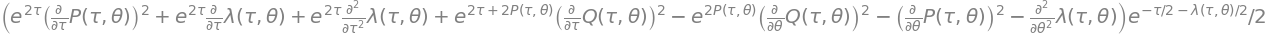

In [37]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [38]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢     ⎛                  2                             2                                    
⎢     ⎜ 2⋅τ ⎛∂          ⎞     2⋅τ ∂              2⋅τ  ∂              2⋅τ + 2⋅P(τ, θ) ⎛∂     
⎢0.25⋅⎜ℯ   ⋅⎜──(P(τ, θ))⎟  + ℯ   ⋅──(λ(τ, θ)) + ℯ   ⋅───(λ(τ, θ)) + ℯ               ⋅⎜──(Q(τ
⎢     ⎜     ⎝∂τ         ⎠         ∂τ                   2                             ⎝∂τ    
⎢     ⎝                                              ∂τ                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [39]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [40]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [41]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified 

⎡                                                               2                    2      
⎢                          2                2                  ∂              -2⋅τ  ∂       
⎢   2⋅P(τ, θ) ⎛∂          ⎞    ⎛∂          ⎞    ∂             ───(λ(τ, θ))   ℯ    ⋅───(λ(τ, 
⎢  ℯ         ⋅⎜──(Q(τ, θ))⎟    ⎜──(P(τ, θ))⎟    ──(λ(τ, θ))     2                    2      
⎢             ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ            ∂τ                   ∂θ       
⎢- ───────────────────────── - ────────────── - ─────────── - ──────────── + ───────────────
⎢              2                     2               2             4                 4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(τ, θ) ∂           ∂             ∂           ∂        

In [42]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                 2                           2                2            
⎢   -2⋅τ + 2⋅P(τ, θ) ⎛∂          ⎞     2⋅P(τ, θ) ⎛∂          ⎞    ⎛∂          ⎞    ∂        
⎢  ℯ                ⋅⎜──(Q(τ, θ))⎟    ℯ         ⋅⎜──(Q(τ, θ))⎟    ⎜──(P(τ, θ))⎟    ──(λ(τ, θ
⎢                    ⎝∂θ         ⎠               ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ       
⎢- ──────────────────────────────── - ───────────────────────── - ────────────── - ─────────
⎢                 4                               4                     4               4   
⎢                                                                                           
⎢                       2⋅P(τ, θ) ∂           ∂             ∂           ∂             ∂     
⎢                      ℯ         ⋅──(Q(τ, θ))⋅──(Q(τ, θ))   ──(P(τ, θ))⋅──(P(τ, θ))   ──(λ(τ
⎢                                 ∂τ          ∂θ            ∂τ          ∂θ            ∂θ    
⎢                    - ────────────────────────────────── - ──────────

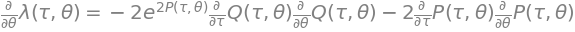

In [67]:
equation2pt2 = Eq( diff(Lambda,theta),solve( ricciSimplified[1,0], diff(Lambda,theta) )[0] ) 
equation2pt2

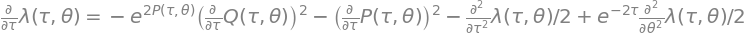

In [68]:
equation2pt3 = Eq(diff(Lambda,tau),solve( ricciSimplified[0,0], diff(Lambda,tau))[0] ) 
equation2pt3

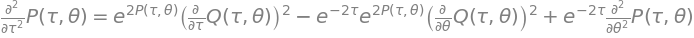

In [69]:
equation2pt4a = Eq(diff(P,tau,tau),expand(solve(ricciSimplified[2,2].args[1],diff(P,tau,tau))[0]))
equation2pt4a

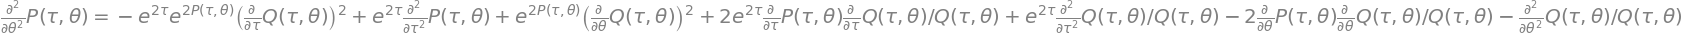

In [62]:
d2pdtheta2 = Eq( diff(P,theta,theta), expand(solve( ricciSimplified[2,3].args[1], diff(P,theta,theta) )[0] ) )
d2pdtheta2

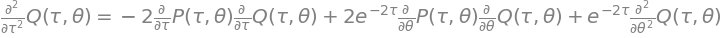

In [70]:
equation2pt4b = Eq( diff(Q,tau,tau), expand(solve(ricciSimplified[3,3].args[1].subs(d2pdtheta2.lhs,d2pdtheta2.rhs), diff(Q,tau,tau) )[0] ))
equation2pt4b

In [72]:
vacuumFieldEquations = Matrix([equation2pt2,equation2pt3,equation2pt4a,equation2pt4b])
vacuumFieldEquations

⎡        ∂                  2⋅P(τ, θ) ∂           ∂               ∂           ∂             
⎢        ──(λ(τ, θ)) = - 2⋅ℯ         ⋅──(Q(τ, θ))⋅──(Q(τ, θ)) - 2⋅──(P(τ, θ))⋅──(P(τ, θ))   
⎢        ∂θ                           ∂τ          ∂θ              ∂τ          ∂θ            
⎢                                                                                           
⎢                                                                2                    2     
⎢                                                               ∂              -2⋅τ  ∂      
⎢                                                              ───(λ(τ, θ))   ℯ    ⋅───(λ(τ,
⎢                                         2                2     2                    2     
⎢ ∂                2⋅P(τ, θ) ⎛∂          ⎞    ⎛∂          ⎞    ∂τ                   ∂θ      
⎢ ──(λ(τ, θ)) = - ℯ         ⋅⎜──(Q(τ, θ))⎟  - ⎜──(P(τ, θ))⎟  - ──────────── + ──────────────
⎢ ∂τ                         ⎝∂τ         ⎠    ⎝∂τ         ⎠         2 